<center><font size="+4">IProML 2021/2022</font></center>
<center><font size="+4">Introduction to Programming and</font></center>
<center><font size="+4">Machine Learning in Python</font></center>
<center><font size="+4">MODULE 2</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin <a href= "mailto:a.vandin@santannapisa.it">a.vandin@santannapisa.it</a>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Daniele Licari <a href= "mailto:a.vandin@santannapisa.it">d.licari@santannapisa.it</a></font></center>

---


<center><font size="+2">Part 2</font></center>
<center><font size="+1">Breast Cancer Diagnosis 1</font></center>
<center><font size="+1">Overview of Data Processing</font></center>

---
---

**This notebook provides an overview of unsupervised learning pipeline**
   * Exploratory Data Analysis (data pre-processing, missing values, visualization ...)
   * Outliers Detection
   * Correlation

You can find more details in the [APPENDIX](#APPENDIX) of this document.

In particular, this notebook will introduce the libraries:

   * [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis 
   * [Seaborn](http://seaborn.pydata.org/): seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**References** 

Some in-depth study material:

* <mark> [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml)</mark>
* [Topics in Statistical Learning, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20202021/tree/main/TSL/slides)
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources.

# What Is Machine Learning?

<img src="images/whats_ml.jpg" alt="ML" style="width: 400px;"/>

Machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- **Supervised learning** models tries to learn the relationship between measured features X of data and some labels y associated with the data; it can be used to apply labels to new, unknown data. This is further subdivided into:
  - *Classification* tasks, the labels are discrete categories
  - *Regression* tasks, the labels are continuous quantities. 

- **Unsupervised learning** involves modeling the features of a dataset X without reference to any label, and is often described as “letting the dataset speak for itself.” These models include tasks such as:
    - *Outlier Detection* is the identification of rare items
    - *Dimensionality Reduction* search for a lower-dimensional representations of the data.
    - *Clustering* identify distinct groups of data

# Benign and Malignant Breast Cancer Case Study 
We will analize Wisconsin Breast Cancer Dataset (WBCD), features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<img src="images/Breast-Biopsy-2.jpg" >

![alt text](images/fna-benign1.png)
![alt text](images/fna-malignant1.png)

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Labels Class:**
* malignant
* benign



This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

![](images/machine_learning_cancer.png)


## Prerequisites
We will start by installing the necessary tools

In [4]:

# numpy for numerical computing
%pip install numpy
# pandas for data processing
%pip install pandas 
 # seaborn for visualization
%pip install seaborn
#sklearn for machine learning 
%pip install sklearn 
# scipy for statistical functions 
%pip install scipy  
# statsmodels for statistical models
%pip install statsmodels
# IProML for visualization and teaching purpose
%pip install pyembeds-sssa

# download the all repository if you are on COLAB
# import os
# import sys
# IN_COLAB = 'google.colab' in sys.modules
# COURSE_NAME = 'SNS-IProML2022' 

# if IN_COLAB: 
#     !git clone https://github.com/EMbeDS-education/{COURSE_NAME}.git
#     os.chdir(f'/content/{COURSE_NAME}/jupyter/jupyterNotebooks')
    


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\d.licari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Load libraries

In [5]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import seaborn as sns # data visualization library based on matplotlib
from IPython.display import display, Markdown # display Markdown code using Python

from warnings import filterwarnings # add this only when you finished your analysis 
filterwarnings('ignore')

## Load Dataset

In [7]:

# load dataset from remote file
data = pd.read_csv('https://raw.githubusercontent.com/EMbeDS-education/SNS-IProML2022/main/jupyter/jupyterNotebooks/data/WBCD.csv')

# load dataset from local disk
# data = pd.read_csv('data/WBCD.csv')

data.shape


(569, 31)

Data layout: df_X and df_y
![](images/05.02-samples-features.png)



## Features matrix
* Here each row of the data refers to a single observed biopsy sample.
* By convention, this features matrix is often stored in a variable named `X`

In [9]:
# Features matrix 
df_X = data.iloc[:,:-1] 
# feature DataFrame
print(df_X.shape)

df_X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Target array
In addition to the feature matrix X, we also generally work with a **label or target array**,
which
* label or target array (usually 1D) may have continuous numerical values, or discrete classes/labels
* by convention we will usually call `y`. 

**Diagnosis Class:**
* malignant
* benign

In [8]:
df_y = data.iloc[:,-1] 

print(df_y.shape)
df_y

(569,)


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: target, Length: 569, dtype: object

# Exploratory Data Analysis (EDA)
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics. 
* It use data visualization methods to discover patterns, spot anomalies, test a hypothesis, or check assumptions.
* It provides a better understanding of data set variables and the relationships between them.



## Data Preprocessing

###  Encoding Categorical Values
![](images/categorical_var.png)
**Some data sets can contain categorical variables**. These variables are typically stored as text values which represent various traits.
* Ordinal, E.g. temperature ("high", "medium", "low")
* Nominal, E.g. city name ("paris", "tokyo", "milan").

**Many machine learning algorithms can support categorical values** without further manipulation **but there are many more algorithms that do not**. 
<!-- Therefore, we should convert these text attributes into numerical values for further processing. -->

*Find and replace* of Pandas: replace the text values with their numeric equivalent by using replace method.

In [8]:
# Encode target labels with value 1 for malignant and 0 for benign
dict_lb_to_num = {'malignant': 1, 'benign':0} # set malignat as true class
df_y.replace(dict_lb_to_num).head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
y_unique = sorted(df_y.unique())
dict_lb_to_num =  dict(zip(y_unique, range(len(y_unique))))
df_y.replace(dict_lb_to_num).head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

[*sklearn.preprocessing.LabelEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is a utility class to transform non-numerical labels to numerical labels such that they contain only values between 0 and n_classes-1. 
This transformer should be used to encode target values, i.e. y, and not the input X.

In [10]:
from sklearn.preprocessing import  LabelEncoder
# convert categorical variable (label) into numerical variable
le = LabelEncoder()
le.fit_transform(df_y)[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [11]:
# convert categorical ordinal variable (feature) into numerical variable
df_performance = pd.Series(["good", "bad", "optimal"], name='performance')
df_performance
le.fit_transform(df_performance)

array([1, 0, 2])

#### Dummy variable for nominal categorical variable

In [12]:
# nominal categorical variables
df_city= pd.DataFrame({'city':["paris", "paris", "tokyo", "milan"]})
df_city

,city
0,paris
1,paris
2,tokyo
3,milan


In [13]:
le.fit_transform(df_city.city)

array([1, 1, 2, 0])

[*pandas.get_dummies*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) convert categorical variable into dummy/indicator variables. 
* It takes only the value 0 or 1 to indicate the absence or presence of categorical values 

In [14]:
# it also called one-hot encoding which creates a binary variable (0/1) for each possible value,
features_encoded = pd.get_dummies(df_city, columns=['city'])
features_encoded

,city_milan,city_paris,city_tokyo
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0


In [15]:
from scipy.spatial import distance
paris = (0,1,0)
milan = (1,0,0)
tokyo = (0,0,1)

print(distance.euclidean(paris, milan))
print(distance.euclidean(milan, tokyo))
print(distance.euclidean(milan, paris))


1.4142135623730951
1.4142135623730951
1.4142135623730951


In [16]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>


![](images/categorical_var_wf.png)

<div class="alert alert-block alert-info" style='color:black'>
<b>Tip</b>      
We apply get_dummies when:

* The categorical (Nominal) variables are in features matrix

We apply Label Encoding or Replace when:
* The categorical variable is target array
* The categorical (Ordinal) variables are in features matrix
    
</div>

**Note:**
*A categorical variable that can take exactly two values is called a binary variable (e.g. off/on). In this case, the dummy variable can be created simply by replacing the values with 0/1.*

### Missing Values
<!-- It is not unusual for an object to be missing one or more attribute values -->

<!-- **Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.** To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

* [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html): Generate a boolean mask indicating missing values
* [notnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html): Opposite of isnull()
* [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html): Return a filtered version of the data
* [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html): Return a copy of the data with missing values filled 

you can find more details in the [APPENDIX](#APPENDIX). -->

There aren't null values in our dataset! 


In [17]:
print('Are there null target values?   ',df_y.isnull().values.any())
print('Are there null features values? ',df_X.isnull().values.any())

Are there null target values?    False
Are there null features values?  False


### Duplication

<!-- Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. 
 -->
We  check for duplicate instances in the breast cancer dataset:
* [*duplicated()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html): return boolean Series denoting duplicate rows.

In [18]:
dups = data.duplicated()
print(f'Are there duplicate rows? = {dups.any()}')
data = data.drop_duplicates() #  drop_duplicates return DataFrame with duplicate rows removed.


Are there duplicate rows? = False


There aren't duplicate instances! 

### Scaling
<!-- ![](images/standardization.jpg) -->

Dataset can contains different magnitude, units and range. Scaling is a method used to normalize the range of independent variables or features of data. 




In [19]:
from IPython.display import HTML
# Why Data Scaling is important in Machine Learning
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/-xOUOo82kWY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [13]:
# Example: Why is data scaling important?

# 3 people A,B,C
df_cm_kg = pd.DataFrame({'height_cm':[180,180,100 ], 'weight_kg':[70,69,69.1]}, index=['Dad','Mon','Son'])
df_m_gr = pd.DataFrame({'height_m':[1.8,1.8,1.0], 'weight_gr':[70000,69000,69100]}, index=['Dad','Mon','Son'])

print(df_cm_kg)
print(df_m_gr)


     height_cm  weight_kg
Dad        180       70.0
Mon        180       69.0
Son        100       69.1
     height_m  weight_gr
Dad       1.8      70000
Mon       1.8      69000
Son       1.0      69100


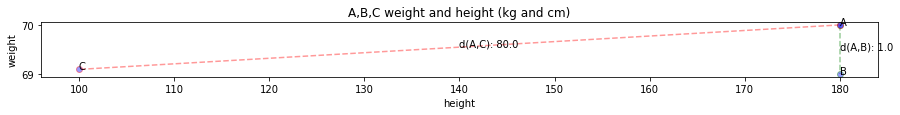

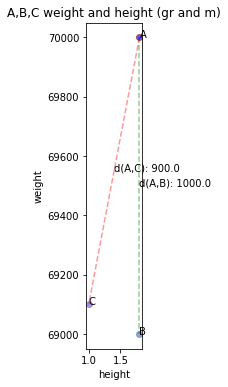

In [14]:
from pyembeds.vis.utils import draw_euclidean_distance

# Draw a scatter plot DF cm and kg
# get A, B, C
A = df_cm_kg.iloc[0,:]
B = df_cm_kg.iloc[1,:]
C = df_cm_kg.iloc[2,:]
draw_euclidean_distance(A,B,C)


# Draw a scatter plot DF m and gr
# get A, B, C
A = df_m_gr.iloc[0,:]
B = df_m_gr.iloc[1,:]
C = df_m_gr.iloc[2,:]
draw_euclidean_distance(A,B,C,figsize=(1,6),title='A,B,C weight and height (gr and m)')

**Why is data scaling important?**
1. Before comparing the features distribution, because differences between values of features are very high to observe on plot

In [ ]:
import numpy as np
np.random.seed(42)

# create dataset Weight normal(70,10) and  Height normal(175,5)
df_w = pd.DataFrame({'Weight': np.random.normal(70, 10, 1000)})
df_h = pd.DataFrame({'Height': np.random.normal(175, 5, 1000)})

# plot raw distributions
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Comparison Raw Distributions')
sns.distplot(df_h, ax=ax[0])
sns.distplot(df_w,ax=ax[0])

# plot raw distributions
ax[1].set_title('Comparison Standardized Distributions')
sns.distplot(df_h.apply(lambda x: (x-x.mean())/x.std()), ax=ax[1])
sns.distplot(df_w.apply(lambda x: (x-x.mean())/x.std()), ax=ax[1])
plt.show()

2. Many ML algorithm calculate the distance between points by the Euclidean distance during the training phase. **The range of all features should be normalized so that each feature contributes proportionately to the final distance.**

[*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) standardizes the features by removing the mean and scaling to unit variance. The standard score (*z-scores*) of a sample x is calculated as:

`z = (x - u) / s`

where u is the mean of the data samples  and s is the standard deviation of the data samples.

![](images/standardization.png) image from https://youtu.be/2tuBREK_mgE?t=165

In [10]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_X.values)
# scaled_features

In [11]:
df_X_scaled = pd.DataFrame(scaled_features, index=df_X.index, columns=df_X.columns)
df_X_scaled.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [ ]:
# # fit 
# X_mean = df_X.mean()
# X_std = df_X.std()

# # transform  z = (x - u) / s
# X_scaled = (df_X - X_mean) / X_std

# # inverse transform x = z * s + u 
# X = X_scaled * X_std + X_mean
# # scaler.inverse_transform(df_X_scaled.values)

## Visualization and Trends

### Count Plot

Let's see the number of samples in the two classes and the percentages.
<!-- The plot below represents the class distribution of malignant and benign samples. -->

* we have 212 malignants (around 37% of the data) and 357 benign breast cancer masses (63%).

Count plot visualization is done by using [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function.

In [ ]:
sns.countplot(df_y)

In [ ]:
#Show the counts of observations for each categorical value using bars.(a histogram for a categorical variable)
ax = sns.countplot(df_y) # Returns the matplotlib Axes object

# gets shapes and draws annotations
for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format(height/len(df_y)*100), ha="center") 

df_y.value_counts() # Return a Series containing counts of unique values.

 We plot features in 3 groups and each group includes 10 features to observe better.

In [20]:
df_X_mean  = df_X_scaled.iloc[:,:10]
df_X_se    = df_X_scaled.iloc[10:20]
df_X_worst = df_X_scaled.iloc[20:30]

<!-- As the dataset contain many variables, and relationship between each and every variable is to be analysed, a pair plot is used to visualize the data further. 

It shows the data as a collection of points.  The position of one variable in the same data row is matched with another variable’s value. Each value is a position on either the vertical or horizontal dimension indicates its correlation.  -->

### Scatterplot Matrix

* It allows both, distribution of single variables and relationships between two variables.
* It is an effective method to identify trends for analysis.

To implement pair plots in python seaborn is used and is made by using [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function

see https://www.python-graph-gallery.com/

In [21]:
data_mean_target = pd.concat([df_X_mean,df_y], axis=1)

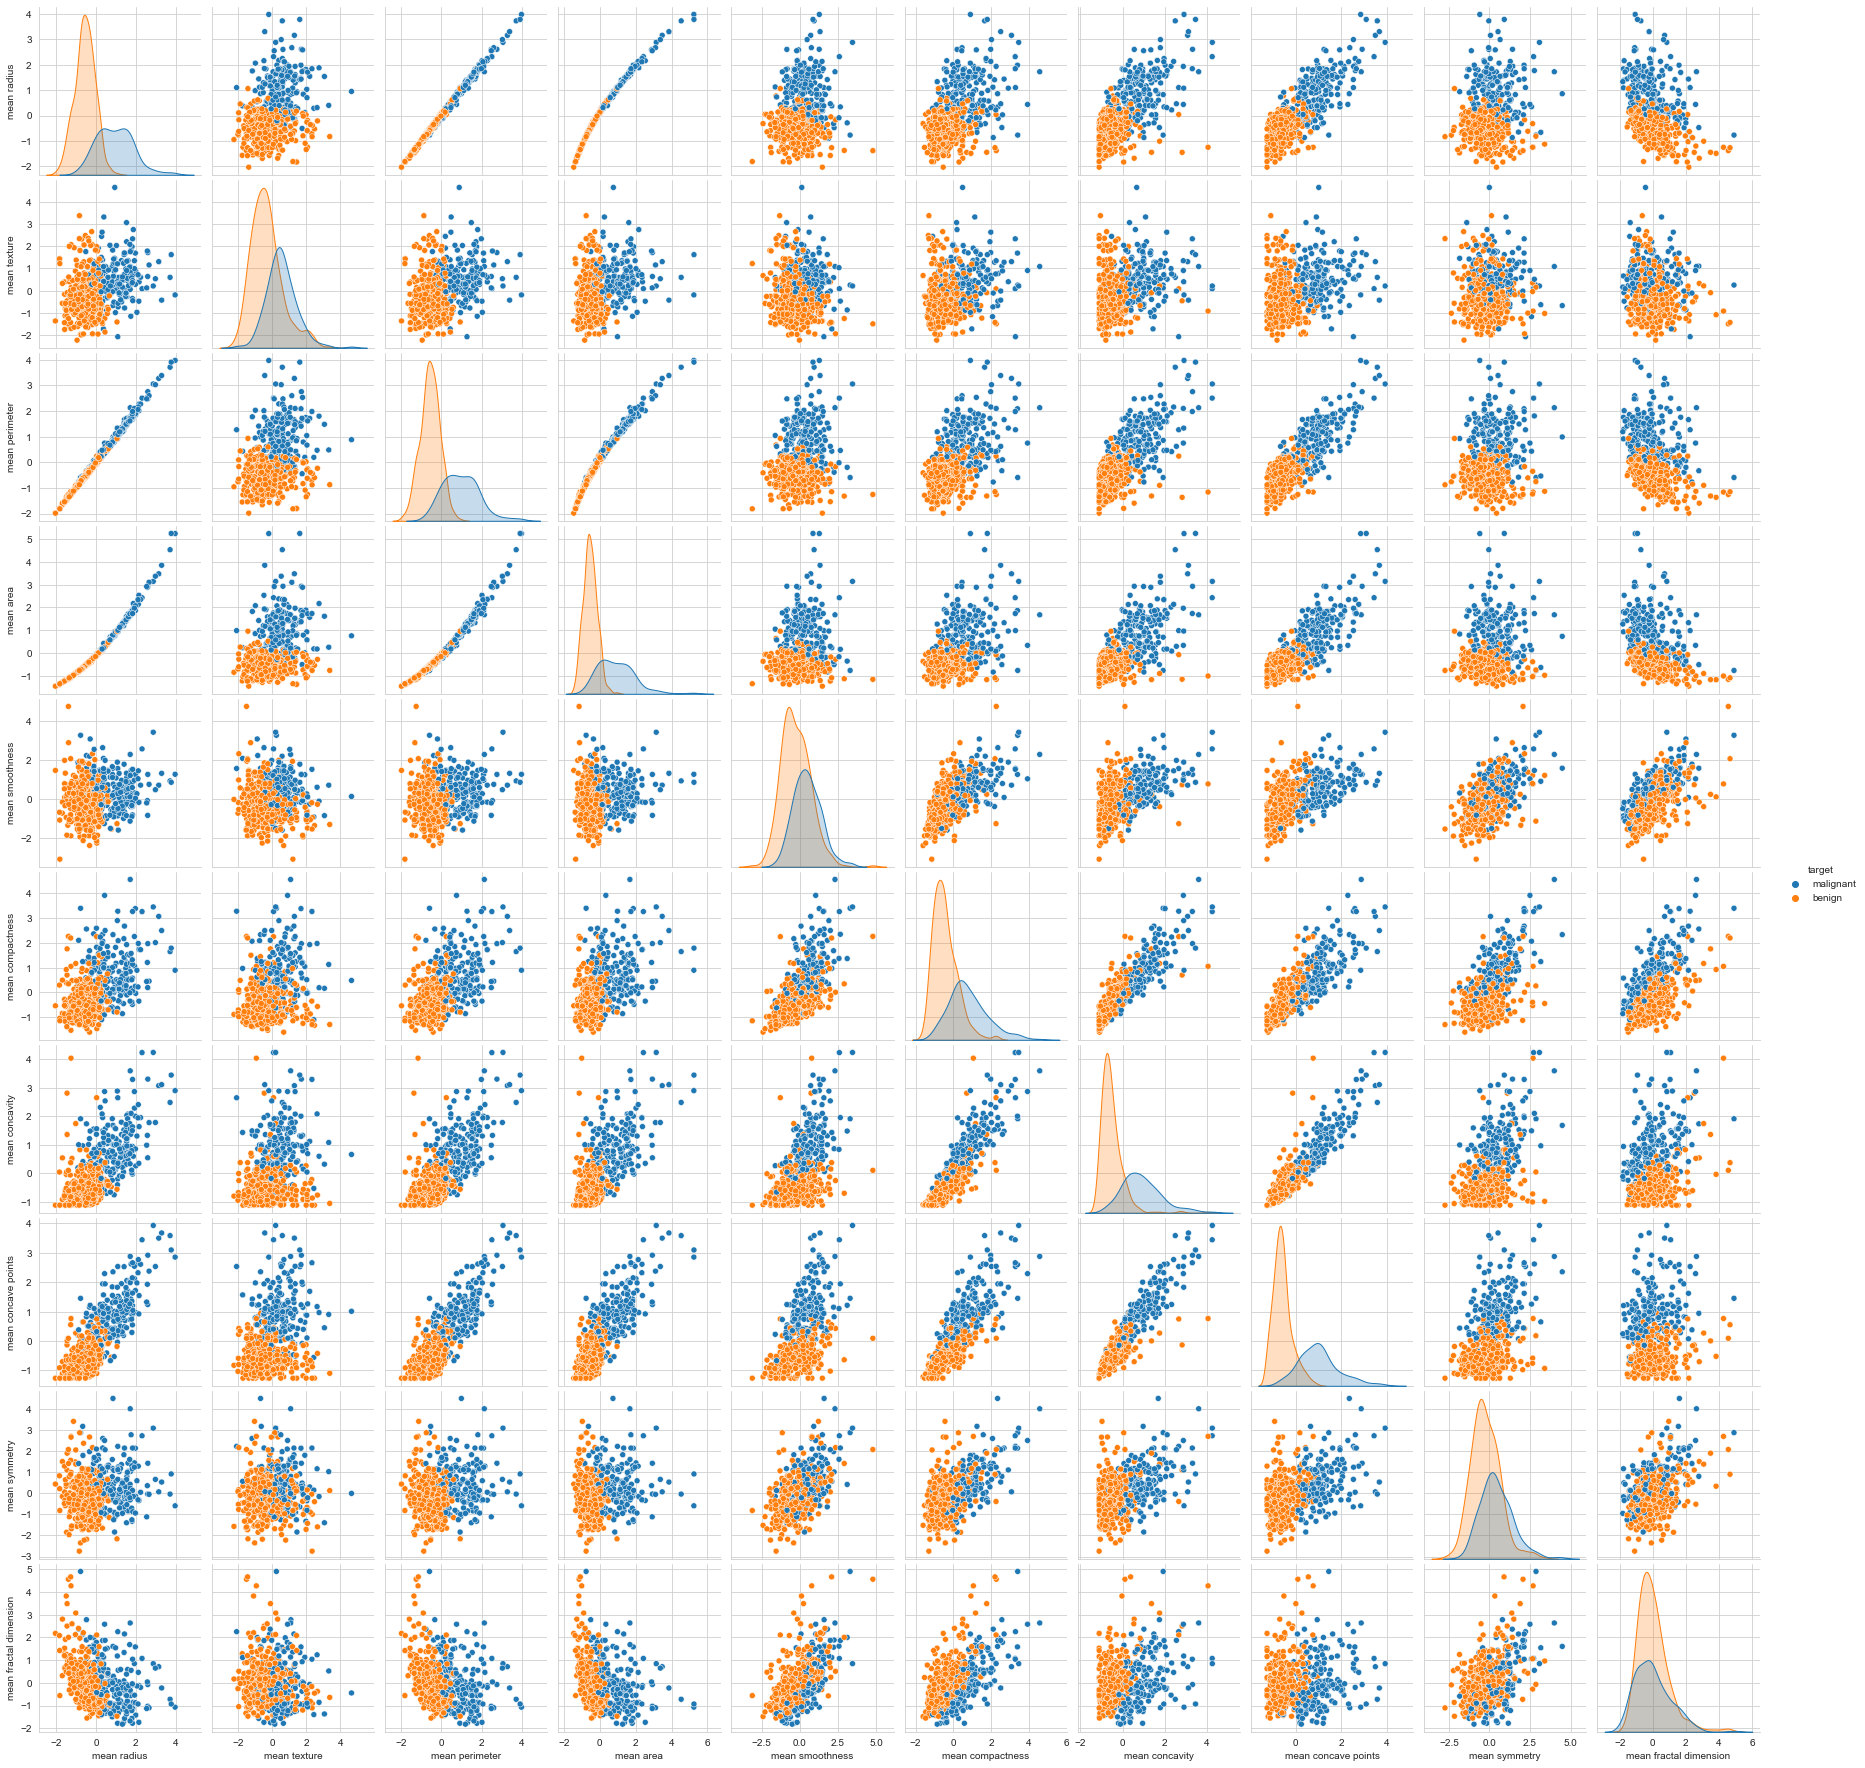

In [22]:
# sns.set(font_scale=1.5)

#Plot pairwise relationships in a dataset.
sns.pairplot(data_mean_target, hue='target')  #hue: Grouping data points with different colors
# sns.pairplot(pd.concat([df_X_se,df_y], axis=1),  hue='target')
# sns.pairplot(pd.concat([df_X_worst,df_y], axis=1),  hue='target')
# ax.set_yticklabels(rotation=90)
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *radius*, *area* and *perimeter* characteristics are closely related.
2. The benign tumors have smaller cell nuclei and  Binomial distribution (for *radius*, *area* and *perimeter*)
</div>

### Violin plot

It used to represent comparison of a variable distribution (or sample distribution) across different "categories".
[*seaboarn.violinplot*](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

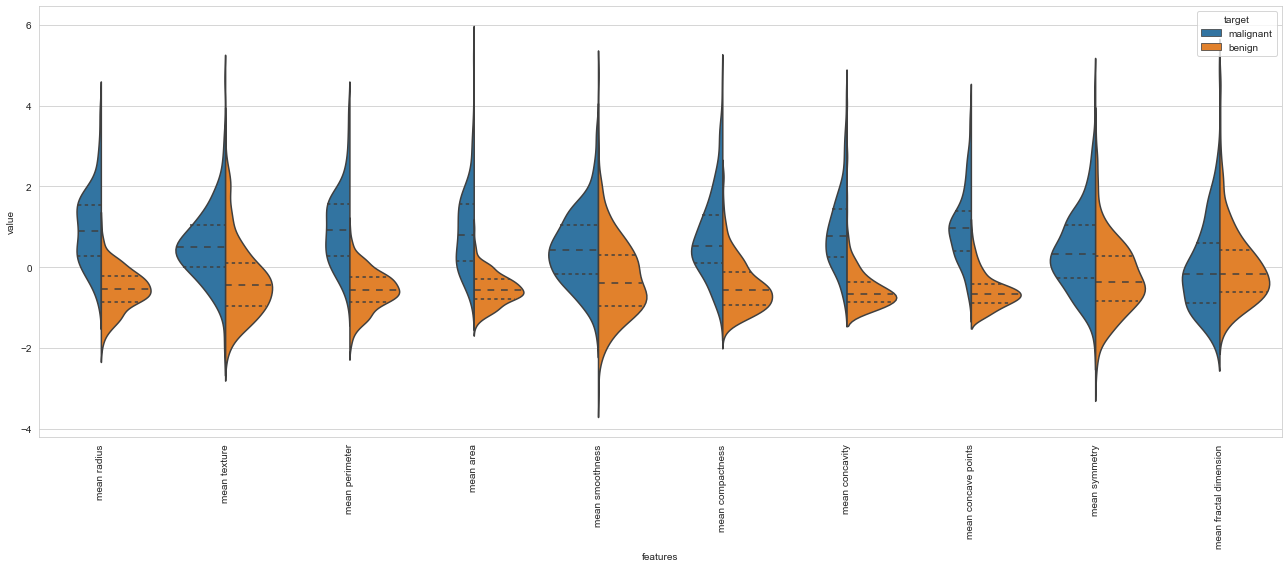

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
df_mean = pd.concat([df_X_mean, df_y], axis=1) 

 
# Unpivot the DataFrame from Wide to long format  |Target | Features| Value | [https://bit.ly/3j2Qj1O]
data_for_violinplot = pd.melt(df_mean,id_vars="target",var_name="features", value_name='value')

#violin plot
sns.violinplot(x="features", y="value", hue="target", data=data_for_violinplot, split=True, inner="quart" )
# sns.swarmplot(x="features", y="value", hue="target", data=data_for_violinplot)
plt.xticks(rotation=90) 
plt.tight_layout()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *mean concave points*, *mean concavity* and *mean area* have well seperated distribution on target variable (seems to be good predictors)
2. The *mean fractal dimension*, *mean symmetry* and *mean smoothness* have similar distribution on target variable
</div>


## Outliers Detection
Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid.

*Why finding outliers is important?*
* No Valid data (human error, erroneous procedures, instrumentation error, calibration error)
* Data analysis and not only data cleaning (investigating the causes outliers in data)
* Summarize data by statistics that represent the majority of the data
* Train a model that generalizes to new data (remove outilers only in the training set)



In [ ]:
from IPython.display import HTML
# Why is it important to identify and understand outliers
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/Ua-lbOmO2NM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### InterQuartile Range 
The Tukey’s boxplot is often used to pinpoint possible outliers: 

1. a box is drawn from the [ﬁrst quartile Q1](https://en.wikipedia.org/wiki/Quartile) to the third quartile Q3 of the data 
2. calculate the Interquartile Range  IQR = Q3 − Q1
3. points outside the interval [Q1 − 1.5 IQR, Q3 + 1.5 IQR], called the fence (or whisker), are  marked as outliers. 

![](images/box_plot_ref_needed.png)

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled ) 
plt.xticks(rotation=90)  
plt.tight_layout()



$$outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0&   & (Q1 - 1.5 * IQR)\leq x \leq (Q3 + 1.5 * IQR) \\
    1&   & Otherwise 
  \end{aligned}
  \right.
\end{equation}
$$

where X is the parameter values

In [ ]:
# iqrOutliers(df_X.iloc[:,5:7])

In [ ]:
def iqrOutliers(df , k = 1.5):
    """
    It identifies values that fall outside of k time the inter-quartile range (IQR) of the first or third quartile 
    
    :param x: 
        pandas.Series or DataFrame containing data 
    :param k:
        float, proportion of the IQR to extend the whiskers
    
    :return: a boolean mask  x < (Q1 - k * IQR) OR  x > (Q3 + k * IQR)
    """
    IQR = df.quantile(0.75)-df.quantile(0.25) # Q3 - Q1     
    minimum = df.quantile(0.25) - k * IQR    # Q1 - k IQR
    maximum = df.quantile(0.75) + k * IQR    # Q3 + k IQR
    # Return True if x < (Q1 - k * IQR) OR  x > (Q3 + k * IQR)
    return (df < minimum) | (df > maximum )


filter_rows = iqrOutliers(df_X).any(axis=1)
# numpy.any Test whether any array elements along a given axis 1 evaluate to True (outliers).
# logical OR reduction is performed along axis.

df_X_clean_iqr = df_X[filter_rows]

print("How many outliers?",len(df_X_clean_iqr))


*NOTE:* the boxplot assumes symmetry because we add the same amount to Q3 as what we subtract from Q1.At asymmetric distributions, the usual boxplot typically ﬂags many regular data points as outlying.



### Z-Score
People often use rules to detect outliers. The classical rule is based on the **z-scores** that we introduced before.
**This technique assumes a Gaussian distribution of the data**. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. 

$$outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    1&   &|X-\hat{X}| > 3 \sigma \\
    0&   &|X-\hat{X}| \leq 3 \sigma 
  \end{aligned}
  \right.
\end{equation}
$$

where **X** is the parameter values, $\hat{X}$ is the mean of parameter, and **σ** is its standard deviation.

More precisely, the rule ﬂags xi as **outlying if |zi| exceeds 3**, say.
(This cutoff is based on the fact that when the data are normally distributed, 99.7% of the observations fall within 3 standard deviations around the mean).
We would have considered outliers all the absolute values plotted over the value 3 on the y axis. 

In [ ]:
# filter outliers from df_X in original features matrix
# computer z_score = [(x - u) / s] and filter |z_score| <3 
z_score = (df_X - df_X.mean()) / df_X.std()

df_X_outiler_z = (df_X[(z_score.abs() > 3).any(axis=1)])
print("How many outliers?",len(df_X_outiler_z))

In [33]:
# filter outliers from df_X on scaled features matrix
#  |z_score| > 3
df_X_outiler_z = df_X_scaled[(df_X_scaled.abs()>3).any(axis=1)] 
print("How many outliers?",len(df_X_outiler_z))

How many outliers? 74


### Extreme Outlier

Extreme outliers can be indicate no valid data

#### Boxplot
We can use boxplot simply identifying values that fall outside of 3 time the inter-quartile range (IQR) of the first or third quartile (Tukey 1977).

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled, whis= 3.0 )
plt.xticks(rotation=90)  
plt.tight_layout()


$$extremeOutlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0&   & (Q1 - 3 * IQR)\leq x \leq (Q3 + 3 * IQR) \\
    1&   & Otherwise 
  \end{aligned}
  \right.
\end{equation}
$$

where X is the parameter values

In [ ]:
################################
def iqrExtremeOutliers(x):
    return iqrOutliers(x , 3)

df_X_clean_iqr_extreme = df_X[ iqrExtremeOutliers(df_X).any(axis=1)]
print("How many extreme outliers?",len(df_X_clean_iqr_extreme))

#### Visual Approach
We can use a "visual" approach for detection (based on density of the points above a specific threshold) and detection of the outliers (very far from the mean). 

We notice a not very dense region of points above the 6 value.
    
We suspect there are some mistakes

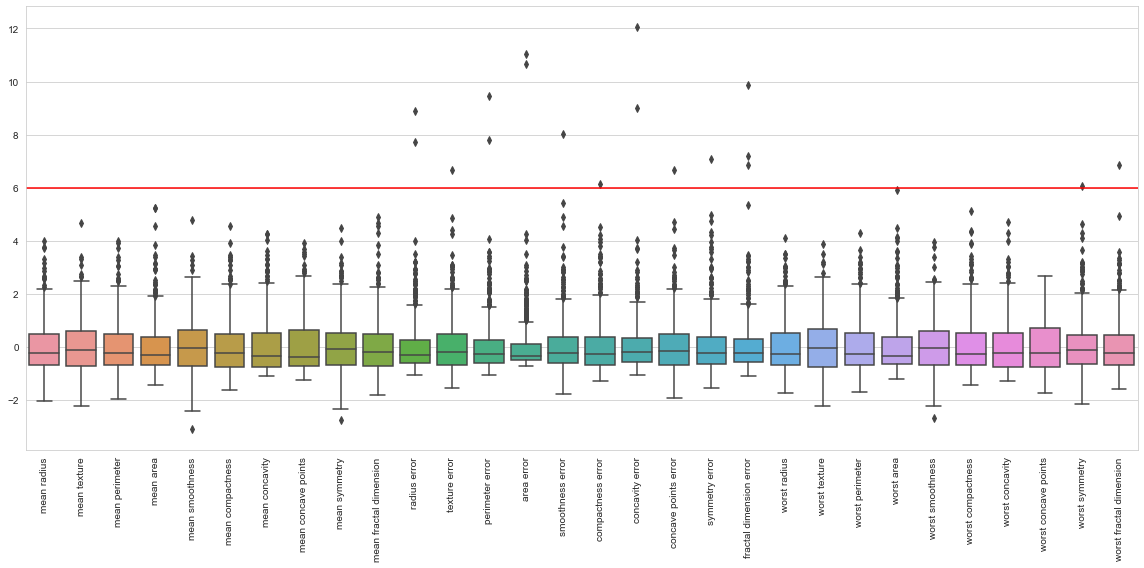

In [24]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled ) 
plt.xticks(rotation=90) 
plt.axhline(y=6, color='r', linestyle='-')
plt.tight_layout()

In [46]:
# getting outilers data for discussing with domino experts

df_X_extreme_outiler=df_X_scaled[(df_X_scaled.abs() > 6).any(axis=1)] 
print("How many extreme outliers?",len(df_X_extreme_outiler))

df_X_extreme_outiler 



How many extreme outliers? 12


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
78,1.719055,1.089149,2.130809,1.678336,2.294354,4.568425,3.598263,2.875535,3.995524,2.639918,...,1.470454,0.984029,1.877663,1.305104,1.382207,2.303684,2.379147,2.073768,4.107940,0.869706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-1.251733,-0.248914,-1.286742,-1.043186,-1.911524,-1.533193,-1.114873,-1.261820,-0.579108,0.237079,...,-1.304866,-0.789340,-1.340697,-1.013934,-2.682695,-1.443878,-1.305831,-1.745063,-1.604443,-1.017203
212,3.971288,-0.190738,3.976130,5.244841,1.269571,0.895628,2.903973,2.852321,-0.597362,-1.069952,...,2.452025,-1.173652,2.419765,2.845036,-0.796437,-0.653093,0.229857,0.683579,-2.026684,-1.590202
213,0.935176,1.459153,0.928055,0.833637,0.301721,0.194424,0.996873,0.439809,-1.838683,-0.586549,...,0.372916,0.389649,0.391350,0.246841,-0.353694,-0.476882,0.038915,-0.071660,-2.099484,-0.873676
290,0.080293,0.102473,0.167272,-0.011061,-0.625564,1.198852,0.595114,0.441099,-0.356400,1.293194,...,-0.103373,-0.577643,-0.165645,-0.199142,-1.426358,-0.044944,-0.240780,-0.190427,-1.017189,0.224112


In [48]:

# saving unscaled outilers data and save them into a CSV file and send it to doctors 
data_outiler_noscaled = scaler.inverse_transform(df_X_extreme_outiler)


df_X_outiler_noscaled = pd.DataFrame(data_outiler_noscaled, index=df_X_extreme_outiler.index, columns=df_X_extreme_outiler.columns)
df_to_check = df_X_outiler_noscaled.join(df_y)


In [49]:
import os
dir_to_save = 'data'
if not os.path.exists(dir_to_save):
    os.makedirs(dir_to_save)
    
df_to_check.to_csv("data/WBCD_outliers_for_doctors.csv")

*Outlier detection is important in medical applications* as well as many other applications that requires concentrating on uncommon activities. **It can identify potential patient management errors or problems with the instrumentation.**

**Let's assume that the doctors confirm to us that the 12 outliers we found
they are invalid data that we can then eliminate from our analysis** (or replace outliers with a fixed value, e.g., the median of their distribution).*
<div class="alert alert-block alert-warning" style='color:black'>
<b>NOTE:</b>
Before removing them we should discuss with domino experts to understand why these points are not valid (for example, the measuring equipment failed, the measurement method was unreliable for some reason, there were contaminants, etc ...).
</div>

In [ ]:
# remove no valid data from df_X in original features matrix
df_X_clean = df_X[df_X.apply(lambda x:  ((x-x.mean())/x.std()) < 6).all(axis=1)] 

# remove no valid data from sclaed df_X in original features matrix
df_X_clean=df_X_scaled[df_X_scaled.apply(lambda x: np.abs(x) < 6).all(axis=1)] 


In [ ]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>

**it’s important to investigate the nature of the outlier before deciding whether to drop it or not.**
* <div class="alert alert-block alert-warning" style='color:black'> <b>DROP</b> <br>If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.</div>

    - For example a year field with a '9999' value. This is can be a human, instrument error or calibration error. **NOTE: if you remove invalid data you have to redo the whole analysis (e.g. scaling )**

* <div class="alert alert-block alert-warning" style='color:black'><b>DROP AND EXPLAIN WHY</b>
    <br>More commonly, the outlier can affect results. In this situation, it is not legitimate to simply drop the outlier. You may run the analysis both with and without it.</div>
   
   - For example, you can remove the outliers (*only in the training dataset used to build the model*) and compare the result with the model obtained from raw data (with outliers). We will talk about predictive models, training sets and testing sets in the next lesson.


More generally, removing outliers or not depends on your purpose, and from that it should become clear whether the outlier should be removed. 
 - For example, if you want to create an infographic that summarizes data from a population, removing the outlier will likely have a more significant impact than keeping it.

We saw some simple univariate outlier detection techniques,  you can find more details in the [APPENDIX](#APPENDIX).

## Correlation
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data and as a diagnostic for advanced analyses. [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
from IPython.display import HTML
# Correlation and Redundant Features
HTML('<iframe width="800" height="450" src="https://www.youtube.com/embed/O0tOmWULrf8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(16,9))
sns.heatmap( df_X_clean.corr(),  square = False, annot=True, fmt=".2f")
plt.show()

### Discovering structure in heatmap data

We can the correlation matrix as a hierarchically-clustered heatmap in order to find easly the pattern, for example the variables highly correlate with each other. [seaborn.clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

In [ ]:
sns.set(font_scale=1.0)
# Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.
corr_matrix = df_X_clean.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,14)) # Plot the correlation matrix as a hierarchically-clustered heatmap.
plt.title("Correlation Between Features")
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
 Radius, area and perimeter (mean, the worst, and the standard error ) have stronge positive correlation. 
</div>

[seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) : plotting a bivariate relationship and distributions.

In [ ]:
import scipy.stats as stats #  library of statistical functions (we'll use to compute pearson correlation)

# Plot correlation between 2 features and distribution
sns.set(style="white")

# seaborn.jointplot draws a plot of two variables with bivariate and univariate graphs
ax = sns.jointplot(df_X_clean.loc[:,'mean area'], 
              df_X_clean.loc[:,'mean radius'], 
              kind="reg" )

ax.ax_joint.text(-1,5, f"Pearsonr's correlation: {stats.pearsonr(df_X_clean.loc[:,'mean area'], df_X_clean.loc[:,'mean radius'])[0]:.2f}")

# sns.jointplot(df_X_clean.loc[:,'mean radius'], 
#               df_X_clean.loc[:,'mean area'], 
#               kind="reg")
# sns.jointplot(df_X_clean.loc[:,'mean area'], 
#               df_X_clean.loc[:,'mean perimeter'], 
#               kind="reg")
plt.show()

### Removing multi colinearity
<div class="alert alert-block alert-warning" style='color:black'>
Two highly correlated input variables probably carry similar information. 
We can remove multi colinearity, it means the columns are dependenig on each other so we should avoid it because what is the use of using same column twice.
</div>

So, we can:
- drop _worst radius_,_worst area_,_worst perimeter_, _mean perimeter_, _mean radius_ columns (they have a strong correlation with  _mean area_) and leave only _mean area_.
- drpo _area error_, _perimeter error_ and  leave only _area error_.


In [ ]:
# drop multicolinearity variables
df_X_clean = df_X_clean.drop(['worst radius','worst area','worst perimeter','perimeter error', 'radius error', 'mean perimeter', 'mean radius'],axis=1)
df_X_clean.head(2)

In [ ]:
## saving the preprocessed data on CSV file
df_X_y_clean = df_X_clean.join(df_y)
df_X_y_clean.to_csv("data/WBCD_preprocessed.csv")  # create the 'data' folder before to save

Correlation ‘among the predictors’ is a problem to be rectified to be able to come up with a reliable model.
Another measure that is commonly used to help diagnose multicollinearity is presented in the [APPENDIX](#APPENDIX).

# APPENDIX

This appendix includes further information on the course topics but **will not be exam topics**.

## Missing values

In [ ]:
df = pd.DataFrame([[3, 2 ],[3, np.nan],[4,4]], columns=list('AB'))
df

The *dropna()* function is used to remove missing values. Determine if rows or columns which contain missing values are removed. 

In [ ]:
print(f'Boolean mask\n{df.isnull()} \nDrop missing values')
df.dropna()


Drop columns with too many missing values 

In [ ]:
df_null = pd.DataFrame([[3, 2 ],[3, np.nan],[4,np.nan]], columns=list('AB'))
df_null

In [ ]:
# df_null.dropna(axis=1)
# Drop columns using that limit
limit = len(df_null) * 0.7 # How many non-NA values in each column/row? 2
df_null.dropna(axis=1, thresh=limit) # columns having null values more than or equal to 70 percent are dropped from the dataframe

In the following example, the missing values in the 'B' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [ ]:
df['B'] =  df.B.fillna(df.B.median()) # median() exclude NA/null values when computing the result by default
print(f"Replace missing value in 'B' column by the median value \n{df}")


<div class="alert alert-block alert-info" style='color:black'>
<b>Tip fillna</b>      
We replace :

* The mean  of the numerical column data is used to replace null values when the data is normally distributed
* Median is used if the data comprised of outliers.
* Mode is used when the data having more occurences of a particular value or more frequent value.
    
</div>

In [ ]:
# df_city= pd.DataFrame({'city':["paris", "paris", "", "milan"]})
# df_city = df_city.replace({"": np.nan}) 
# df_city.info()
# most_freq_city = df_city['city'].mode().iloc[0]
# most_freq_city
# df_city.city.fillna(most_freq_city) 



### KNNImputer
[KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) The k nearest neighbors algorithm can be used for imputing missing data by finding the k closest neighbors to the observation with missing data and then imputing them based on the the non-missing values in the neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], 
     [3, 4, 3], 
     [2, 6, 5], 
     [8, 8, 7]]

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

## Data Preprocessing

### Convert Skewed data to Normal Distribution
When it comes to skewed distributions, the most common
response is to transform the data
Generally, the most common type of skewness is
right-skewness
Consequently, the most common type of transformation is the
log transform

In [ ]:
from scipy.stats import skewnorm
df_skewed = pd.DataFrame({'car_crash': skewnorm.rvs(10, size=100)+1}) # positive skewed data
sns.distplot(df_skewed)

In [ ]:

fig, ax = plt.subplots()
## log  transformation: can't be applied to zero or negative values
sns.distplot(np.log(df_skewed))
##square root transformation
sns.distplot(np.sqrt(df_skewed))


### MinMaxScaler
If your feature don't have a normal distribution you can use MinMaxScaler(). It will transform each value in the column proportionally within the range [0,1]. 


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df_X)
minmax_df = pd.DataFrame(minmax_df, columns =df_X.columns)

minmax_df.head(2)

## Exploratory data analysis 

### Interactive graphs
The [plotly](https://plotly.com/python/) Python library is an interactive, open-source plotting library that supports over 40 unique chart types.

Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash.


In [ ]:
# plotly for  web-based visualizations
%pip install plotly

In [ ]:
#Plotly Express is the easy-to-use, high-level interface to Plotly (https://plotly.com/python/plotly-express/)
import plotly.express as px
from IPython.display import HTML


fig = px.histogram(df_y, x='target', color="target", 
                   color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                    "malignant": "tomato", "benign": "limegreen"}
            )
HTML(fig.to_html())

In [ ]:
df = pd.concat([df_X_mean,df_y], axis=1)

fig = px.scatter_matrix(df, color='target',height=1000, title='Scatter Matrix'
                       , color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

fig.update_layout(
    font_size=9, # set fontsize = 9
    plot_bgcolor= 'white',# set background color = white
)


HTML(fig.to_html())

In [ ]:

#violin plot
fig = px.violin(data_for_violinplot,x="features", y="value",  color="target", box=True,
                title='Violin Matrix',
                color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

HTML(fig.to_html())

In [ ]:
fig = px.box(data_for_violinplot,x="features", y="value",  color="target", 
             color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

HTML(fig.to_html())

In [ ]:
fig = px.imshow(df_X_mean.corr(), width=800, color_continuous_scale='RdBu_r')
HTML(fig.to_html())

In [ ]:
# saving into html page
with open('interactive_chart.html', 'w') as f:
    f.write(fig.to_html())

https://www.python-graph-gallery.com/

### Exploring dataset: Decision Tree
Although still under data exploration, we can get useful information by training a Decision Tree from all characteristics. We will explain the Decision Tree model better in the second part of this lesson.

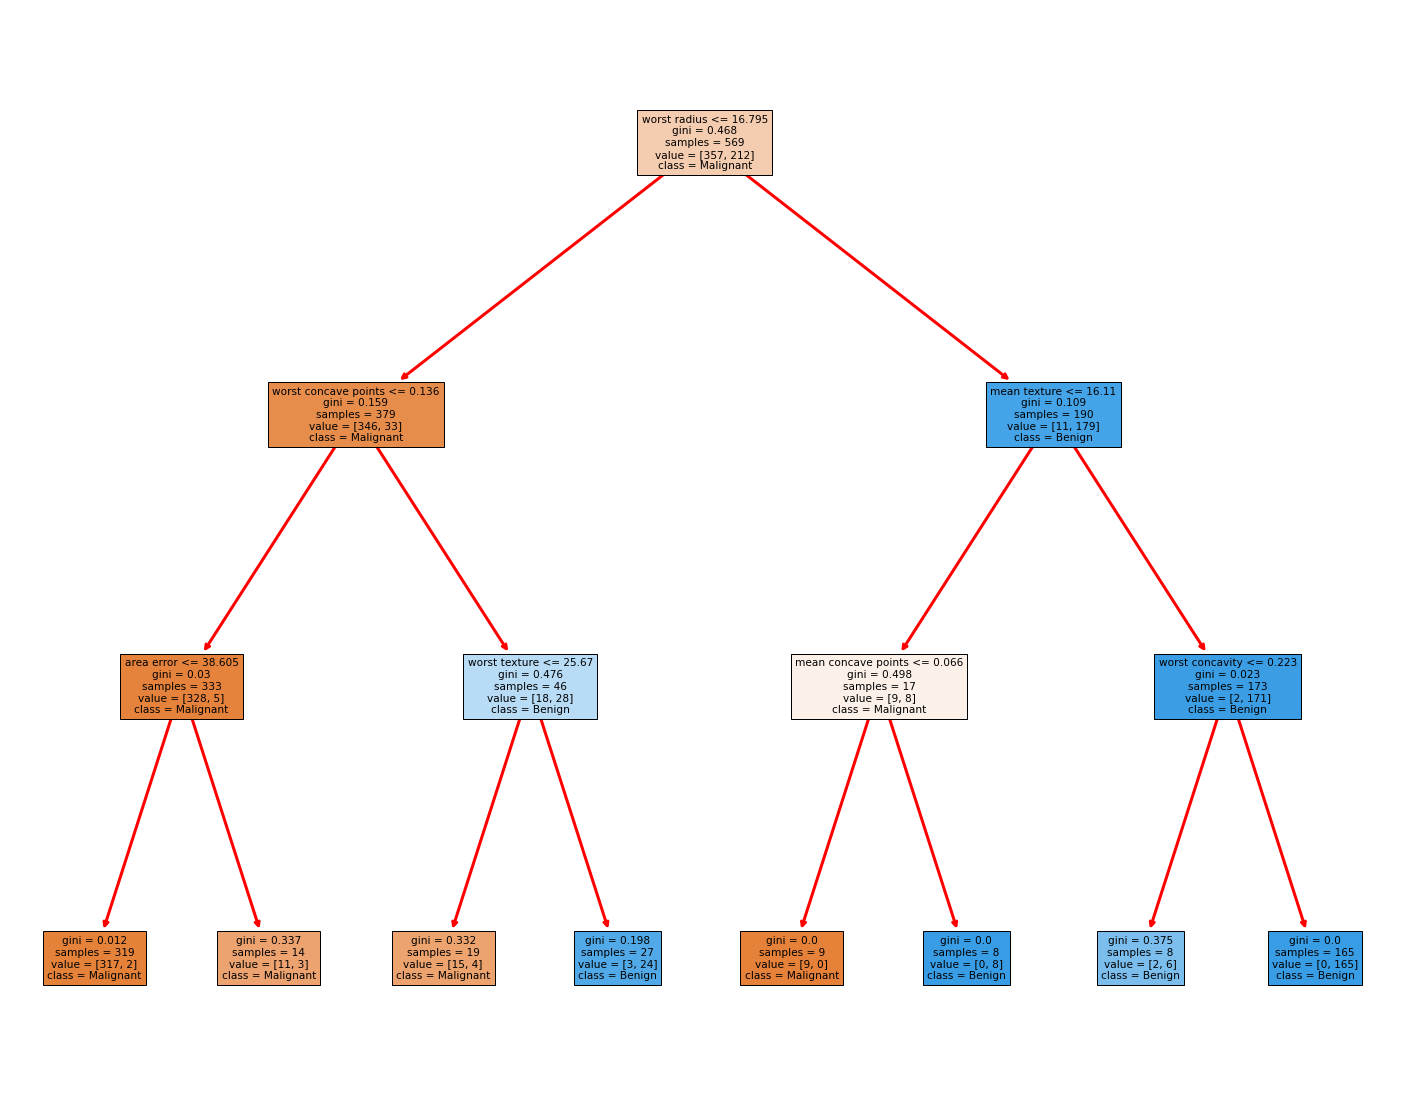

In [15]:
from sklearn import tree
X = df_X.values
y = df_y.values 

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)  
clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, 
                   feature_names=df_X.columns,  
                   class_names=['Malignant','Benign'],
                   filled=True)
for o in out: 
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

## Outliers Detection

1. [Leys C, Delacre M, Mora YL, Lakens D, Ley C. How to Classify, Detect, and Manage Univariate and Multivariate Outliers, With Emphasis on Pre-Registration. International Review of Social Psychology. 2019;32(1):5. DOI: http://doi.org/10.5334/irsp.289](https://www.rips-irsp.com/articles/10.5334/irsp.289). 
2. [Rousseeuw, P.J. and Hubert, M. (2018), Anomaly detection by robust statistics. WIREs Data Mining Knowl Discov, 8: e1236.](https://doi.org/10.1002/widm.1236)

They suggest the use of the median absolute deviation (MAD) to detect univariate outliers. 
Again, the idea is conceptually similar to computed z-scores: for each value, subtract the median from it, and divide by the median of the absolute deviations.

In [ ]:
def mad(x):
    return 1.483 * np.median(np.abs(x- np.median(x)))

df_X_clean_mad = df_X[df_X.apply(lambda x: (x - np.median(x))/mad(x) <= 3.0).all(axis=1)]
print("How many outliers?",len(df_X)-len(df_X_clean_mad))


### Multivariate
[Sklearn includes different advanced outlier detection methods based on machine learning (ML)](https://scikit-learn.org/stable/modules/outlier_detection.html) can handle correlated multivariate dataset, detect abnormalities within them, and do not assume a normal distributions of the features.

#### LocalOutlierFactor
LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. 
It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = df_X.values

# The LOF score of an observation is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density:
# a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(X)
# The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.
lof = clf.negative_outlier_factor_ 

# we obtained the threshold value from the scores by using the quantile function.
# Here, we got the lowest 2 percent of score values as the anomalies.
thresh = np.quantile(lof, .02)

# We extracted the anomalies by comparing the threshold value and identify the values of elements.
index = np.where(lof<=thresh)
values = X[index]
len(values)


## Correlation: VIF 


Another measure that is commonly used to help diagnose multicollinearity is the **variance inflation factor (VIF)**.
Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. **VIF is preferred as it can show the correlation of a variable with a group of other variables.**


VIF measures how much of the variation in one variable is explained by the other variable. This is done by running a regression using one of the correlated x variables as the dependent variable against the other variables as predictor variables.
![](images/vip.png)

Use the following guidelines to interpret the VIF:

|VIF| Status of predictors|
|------|------|
|VIF = 1|Not correlated|
|1 < VIF < 5|Moderately correlated|
|VIF > 5|Highly correlated|



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_X_scaled.columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_X_scaled.values, i) 
                          for i in range(len(df_X_scaled.columns))] 
  
print(vif_data.sort_values(by='VIF', ascending=False ))

 _mean radius_ is  highly correled to the other variable. **Dropping variables should be an iterative process starting with the variable having the largest VIF.**
 
